In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from imblearn.over_sampling import ADASYN
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [2]:
df=pd.read_csv('data.csv')
df

,id,outcome,time,radius,texture,perimeter,area,smoothness,compactness,concacivity,...,perimeter3,area3,smoothness3,compactness3,concavity3,concavepoints3,symmetry3,fractaldimension3,tumour,lymphnode
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [3]:
df['lymphnode'].unique()


array(['5', '2', '0', '?', '10', '1', '20', '6', '13', '4', '17', '15',
       '11', '9', '8', '7', '3', '14', '27', '24', '18', '16', '21'],
      dtype=object)

In [4]:
df.drop(['id','lymphnode'],axis = 'columns',inplace=True)

In [5]:
prognosis = df['outcome'].value_counts()
prognosis

N    151
R     47
Name: outcome, dtype: int64

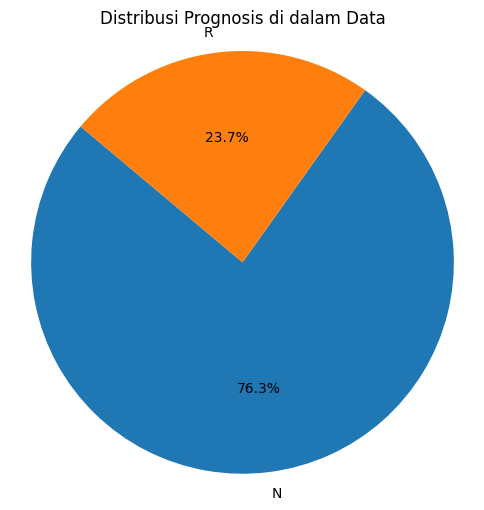

In [6]:
labels = prognosis.index
sizes = prognosis.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Prognosis di dalam Data')
plt.axis('equal')
plt.show()

In [8]:
X = df.drop(columns=['outcome'])
y = df['outcome']


In [9]:
df

,outcome,time,radius,texture,perimeter,area,smoothness,compactness,concacivity,concavepoints,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concavepoints3,symmetry3,fractaldimension3,tumour
0,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,...,37.08,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0
1,0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0
2,0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,...,20.98,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5
3,0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0
4,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,...,24.81,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0
194,0,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,...,41.48,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5
195,0,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,...,36.66,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7
196,1,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,...,27.98,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0


In [10]:

scaler = MinMaxScaler() 
X = scaler.fit_transform(X)

In [11]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [12]:
X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.33, random_state=42,shuffle=True)

In [13]:
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()

In [14]:
lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
lr_pred = lr_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

In [16]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
score=[]

In [17]:
s=[]
s.append('Logistic Regression      ')
s.append(accuracy_score(y_test, lr_pred))
s.append(precision_score(y_test, lr_pred))
s.append(recall_score(y_test, lr_pred))
s.append(f1_score(y_test, lr_pred))
score.append(s)

In [18]:
s=[]
s.append('K-Nearest Neighbour       ')
s.append(accuracy_score(y_test, knn_pred))
s.append(precision_score(y_test, knn_pred))
s.append(recall_score(y_test, knn_pred))
s.append(f1_score(y_test, knn_pred))
score.append(s)

In [19]:
print('Model\t\t\t\tAccuracy\tPrecision\tRecall\t\tF1-score')
for s in score:
    for i in s:
        if(type(i)!=str):
            print('{:.3f}'.format(i), end='\t\t')
        else:
            print(i, end='\t')
    print()

Model				Accuracy	Precision	Recall		F1-score
Logistic Regression      	0.833		1.000		0.154		0.267		
K-Nearest Neighbour       	0.848		0.667		0.462		0.545		


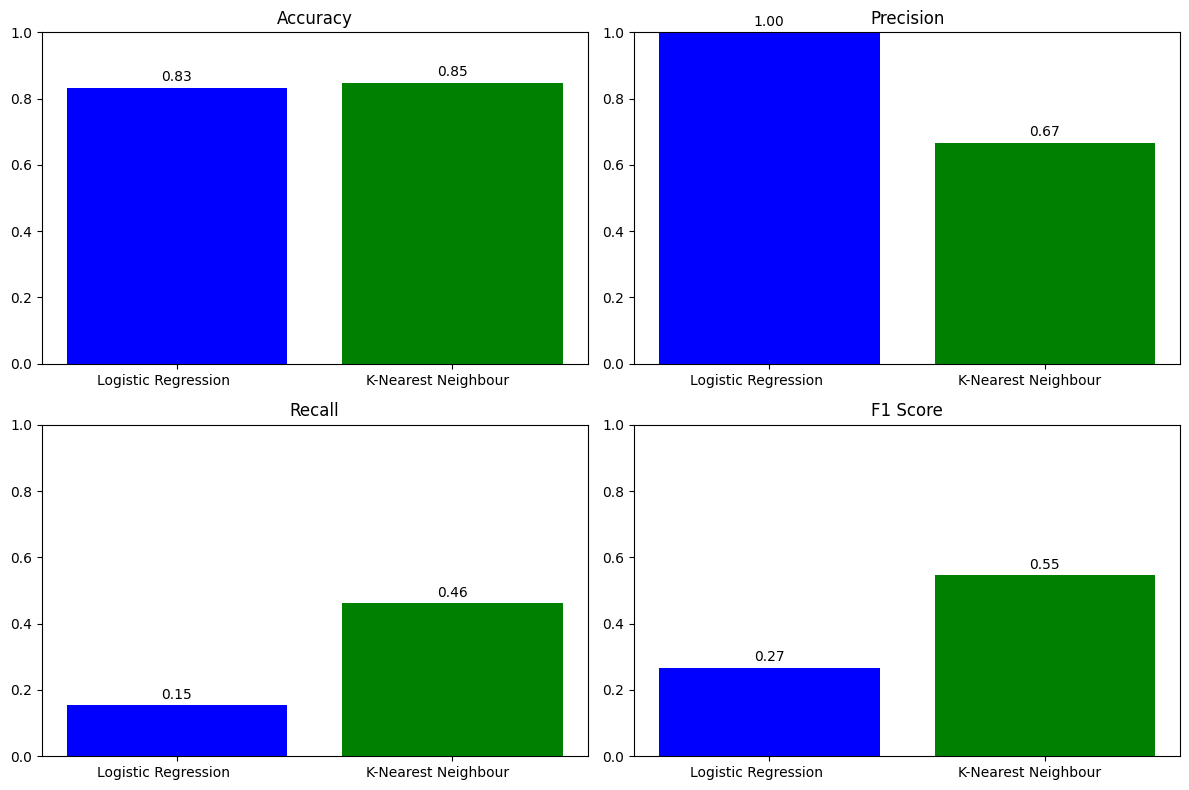

In [20]:
score_df = pd.DataFrame(score, columns=['Model'] + metrics)

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    plt.bar(score_df['Model'], score_df[metric], color=['blue', 'green'])
    plt.title(metric)
    plt.ylim(0, 1)
    for j in range(len(score_df)):
        plt.text(j, score_df[metric][j] + 0.02, f'{score_df[metric][j]:.2f}', ha='center')

plt.tight_layout()
plt.show()

In [21]:
print("X_train",np.shape(X_train))
print("y_train",np.shape(y_train))
print("X_test",np.shape(X_test))
print("y_test",np.shape(y_test))
X_train=np.asarray(X_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)

X_train (132, 32)
y_train (132,)
X_test (66, 32)
y_test (66,)


In [22]:
#Oversampling
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

Training on fold 1...
2/2 [==============================] - 0s 2ms/step
Validation accuracy for fold 1: 0.8524590163934426
Confusion Matrix:
[[24  7]
 [ 2 28]]




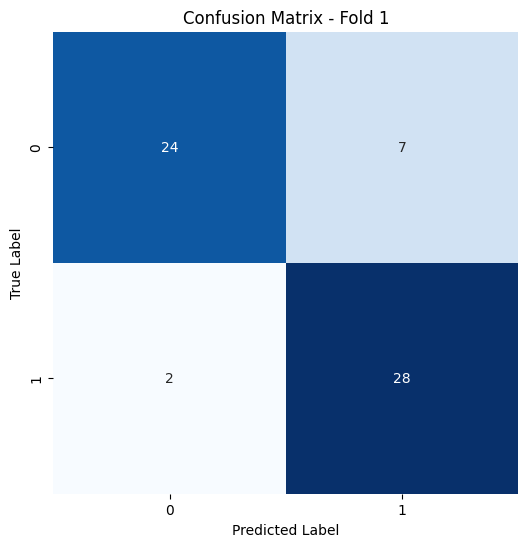

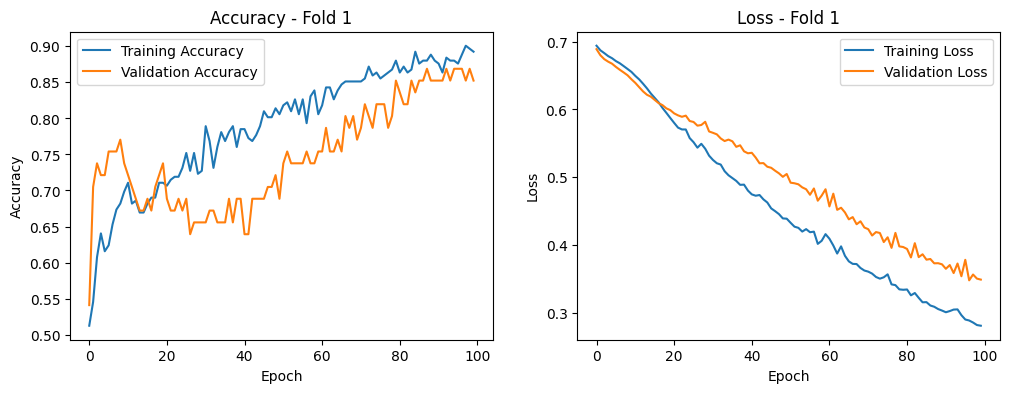

Training on fold 2...
2/2 [==============================] - 0s 2ms/step
Validation accuracy for fold 2: 0.8032786885245902
Confusion Matrix:
[[26  4]
 [ 8 23]]




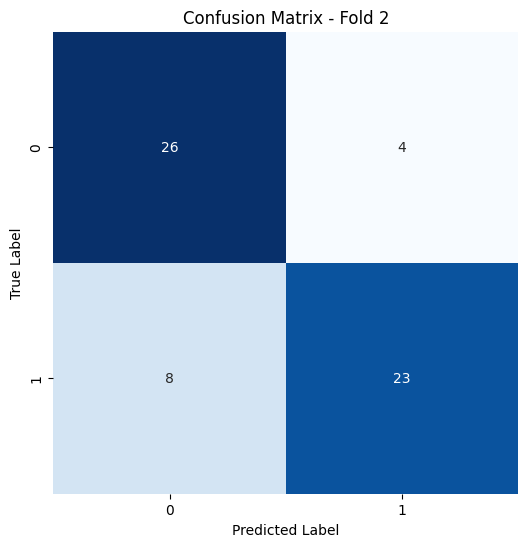

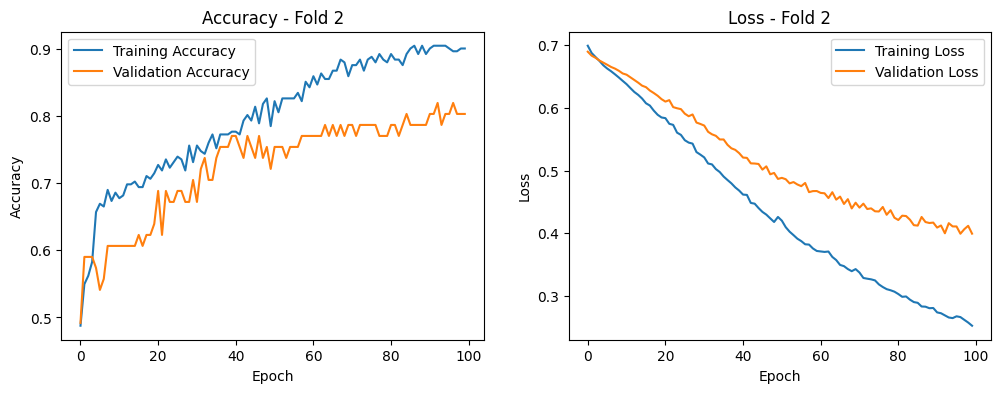

Training on fold 3...
2/2 [==============================] - 0s 997us/step
Validation accuracy for fold 3: 0.8360655737704918
Confusion Matrix:
[[25  5]
 [ 5 26]]




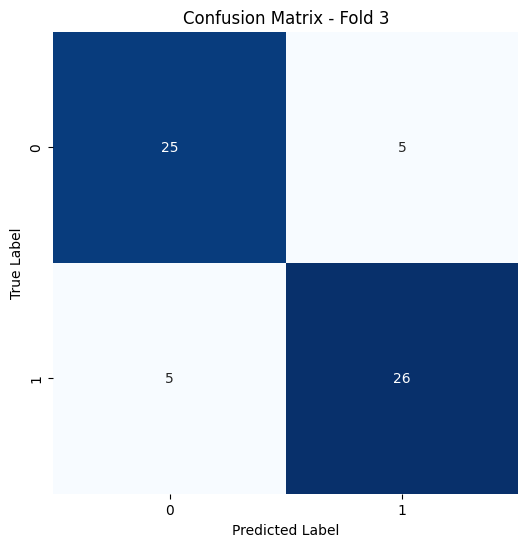

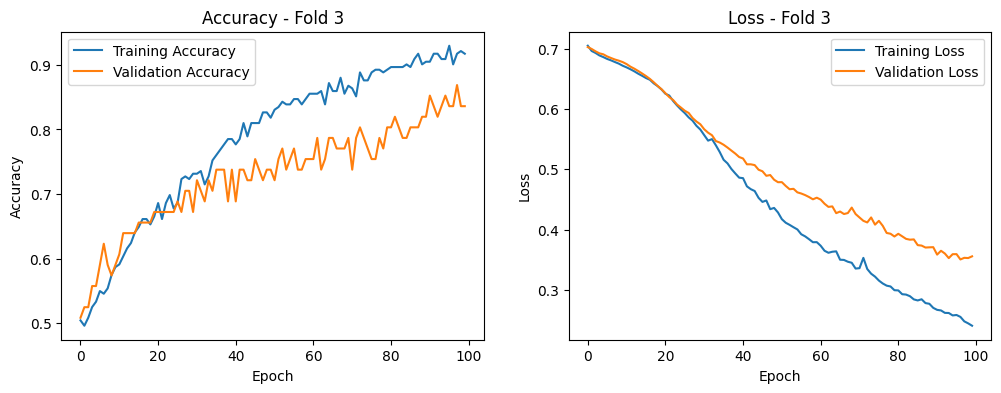

Training on fold 4...
2/2 [==============================] - 0s 997us/step
Validation accuracy for fold 4: 0.8
Confusion Matrix:
[[20 10]
 [ 2 28]]




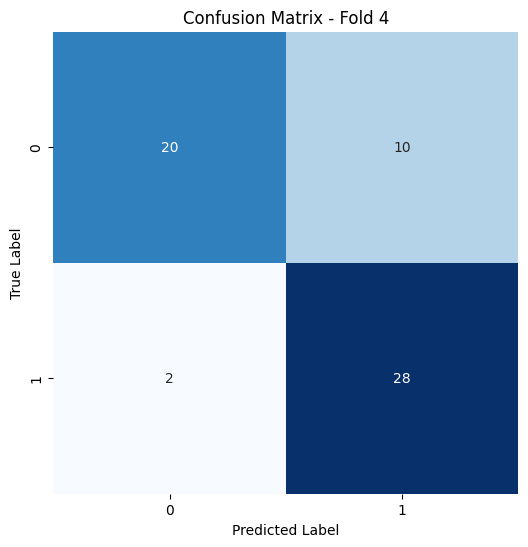

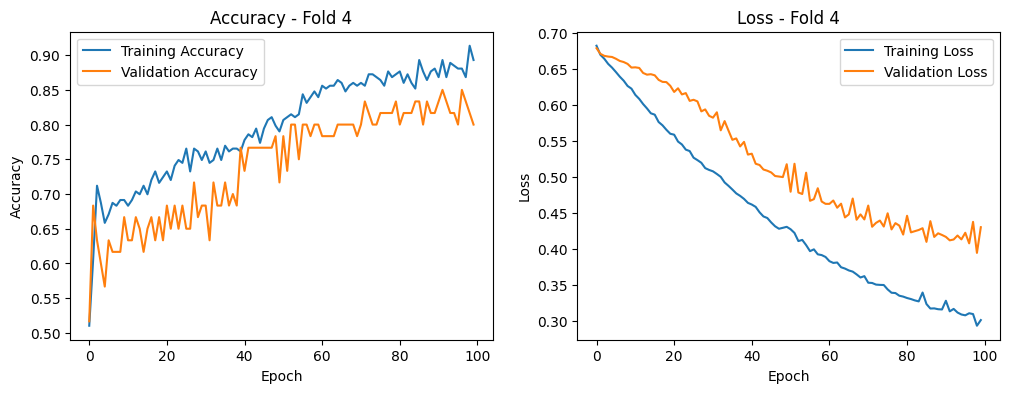

Training on fold 5...
2/2 [==============================] - 0s 997us/step
Validation accuracy for fold 5: 0.7833333333333333
Confusion Matrix:
[[22  8]
 [ 5 25]]




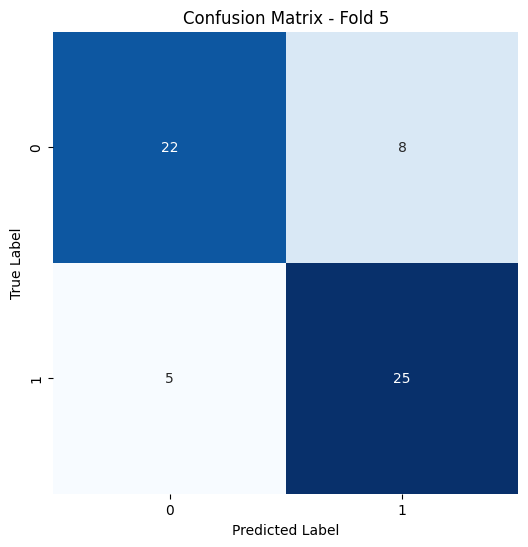

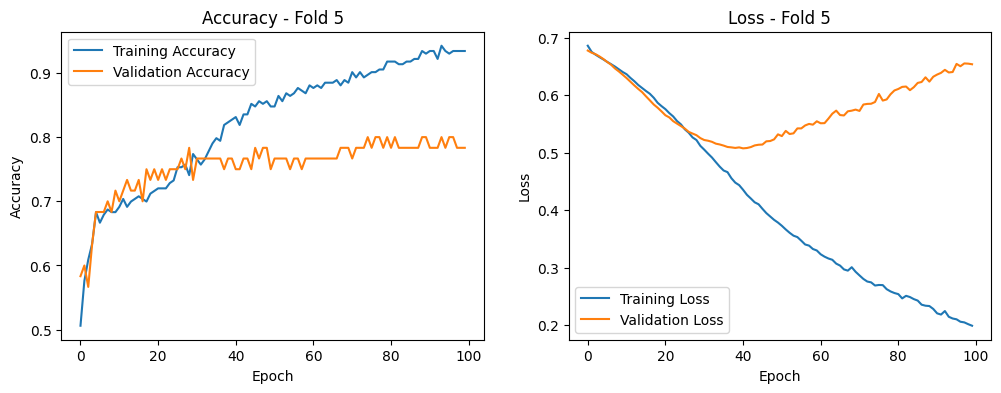

Mean validation accuracy across all folds: 0.8150273224043716
Mean validation precision across all folds: 0.7969958784220245
Mean validation recall across all folds: 0.8561290322580645
Mean validation F1 score across all folds: 0.8221063585298356


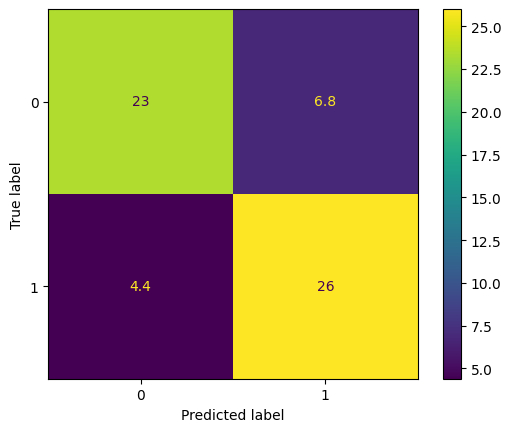

In [24]:
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

validation_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

for fold, (train_index, val_index) in enumerate(skf.split(X_resampled, y_resampled), 1):
    print(f"Training on fold {fold}...")
    
    X_train_fold, X_val_fold = X_resampled[train_index], X_resampled[val_index]
    y_train_fold, y_val_fold = y_resampled[train_index], y_resampled[val_index]
    
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=X_train_fold.shape[1]))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0, validation_data=(X_val_fold, y_val_fold))
    
    y_val_pred = (model.predict(X_val_fold) > 0.5).astype("int32")
    
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred)
    
    validation_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    conf_matrix = confusion_matrix(y_val_fold, y_val_pred)
    conf_matrices.append(conf_matrix)
    
    print(f"Validation accuracy for fold {fold}: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Plot accuracy and loss
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy - Fold ' + str(fold))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss - Fold ' + str(fold))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Calculate and print the mean validation metrics across all folds
mean_accuracy = np.mean(validation_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)
mean_conf_matrix = np.mean(conf_matrices, axis=0)

print(f"Mean validation accuracy across all folds: {mean_accuracy}")
print(f"Mean validation precision across all folds: {mean_precision}")
print(f"Mean validation recall across all folds: {mean_recall}")
print(f"Mean validation F1 score across all folds: {mean_f1}")
displ = ConfusionMatrixDisplay(confusion_matrix=mean_conf_matrix)
displ.plot()



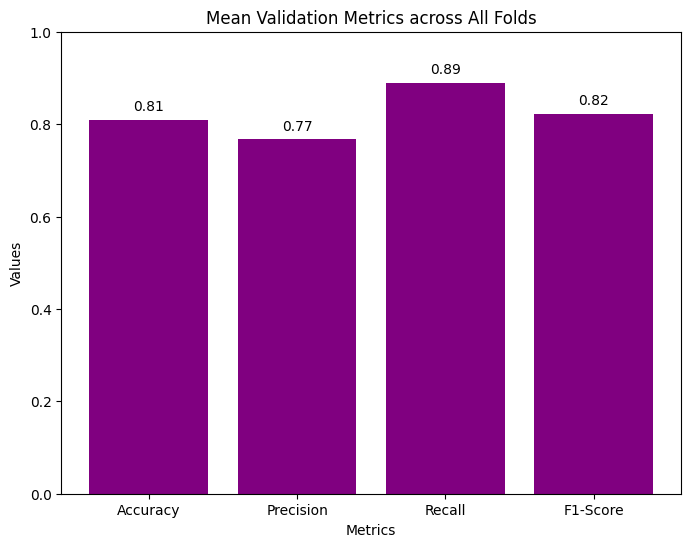

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
mean_values = [mean_accuracy, mean_precision, mean_recall, mean_f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, mean_values, color='purple')
plt.ylim(0, 1)
plt.title('Mean Validation Metrics across All Folds')
plt.xlabel('Metrics')
plt.ylabel('Values')
for i in range(len(metrics)):
    plt.text(i, mean_values[i] + 0.02, f'{mean_values[i]:.2f}', ha='center')

plt.show()